## Getting data

In [1]:
# Note 
# There are some cells without output that's because the limited training time a day ..

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"youssef25","key":"4555973193b0d8b5b138dc3d57fa17b1"}'}

In [ ]:
 !mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pwd

/content


In [ ]:
!mkdir dataset

In [ ]:
%cd /content/dataset

/content/dataset


In [ ]:
!pwd

/content/dataset


In [ ]:
!kaggle datasets download -d grassknoted/asl-alphabet

 99% 1.02G/1.03G [00:07<00:00, 151MB/s]
100% 1.03G/1.03G [00:07<00:00, 150MB/s]


In [ ]:
!unzip -x /content/dataset/asl-alphabet.zip

In [ ]:
%cd /content/dataset/asl_alphabet_train/asl_alphabet_train

/content/dataset/asl_alphabet_train/asl_alphabet_train


In [ ]:
import os
os.listdir('.')

['space',
 'E',
 'Z',
 'R',
 'Y',
 'del',
 'V',
 'T',
 'B',
 'L',
 'I',
 'C',
 'G',
 'J',
 'P',
 'O',
 'D',
 'N',
 'U',
 'A',
 'K',
 'S',
 'Q',
 'W',
 'H',
 'F',
 'M',
 'nothing',
 'X']

In [ ]:
print(f"We have a total number of {len(os.listdir('./'))} classes")

We have a total number of 29 classes


In [ ]:
for folder in os.listdir('./'):
  images = [x for x in os.listdir(f'./{folder}') if (x.endswith('.jpg') or x.endswith('.jpeg'))]
  print(f'{folder} : {len(images)} images')

space : 3000 images
E : 3000 images
Z : 3000 images
R : 3000 images
Y : 3000 images
del : 3000 images
V : 3000 images
T : 3000 images
B : 3000 images
L : 3000 images
I : 3000 images
C : 3000 images
G : 3000 images
J : 3000 images
P : 3000 images
O : 3000 images
D : 3000 images
N : 3000 images
U : 3000 images
A : 3000 images
K : 3000 images
S : 3000 images
Q : 3000 images
W : 3000 images
H : 3000 images
F : 3000 images
M : 3000 images
nothing : 3000 images
X : 3000 images


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow

img = cv.imread('/content/dataset/asl_alphabet_train/asl_alphabet_train/A/A10.jpg')

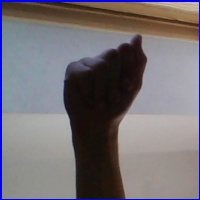

In [ ]:
cv2_imshow(img)

In [ ]:
img.shape

(200, 200, 3)

In [ ]:
img_resized = cv.resize(img, (150, 150))
img_resized.shape

(150, 150, 3)

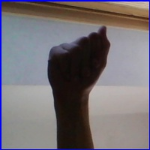

In [ ]:
cv2_imshow(img_resized)

In [ ]:
!pip install git+https://github.com/aleju/imgaug.git 

  Cloning https://github.com/aleju/imgaug.git to /tmp/pip-req-build-tgdhpbrn
  Running command git clone -q https://github.com/aleju/imgaug.git /tmp/pip-req-build-tgdhpbrn
  Created wheel for imgaug: filename=imgaug-0.4.0-py3-none-any.whl size=971122 sha256=7080961935e49325bac22920d41e0c1a615dcb8e9a2426a1e5dd6f35abd424d1
  Stored in directory: /tmp/pip-ephem-wheel-cache-fewmjgga/wheels/0c/78/b5/9303fae9d5e03df1f319adfe4e6534180b5c3232de11bc9a2f
Successfully built imgaug
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.4.0 which is incompatible.


## Data operations

In [ ]:
import tensorflow.keras as keras
import numpy as np
from sklearn.model_selection import train_test_split
import imgaug.augmenters as iaa
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
CLASSES_labels = {}
for index, folder in enumerate(os.listdir('./')):
  CLASSES_labels[folder] = index


In [ ]:
CLASSES_labels

{'A': 19,
 'B': 8,
 'C': 11,
 'D': 16,
 'E': 1,
 'F': 25,
 'G': 12,
 'H': 24,
 'I': 10,
 'J': 13,
 'K': 20,
 'L': 9,
 'M': 26,
 'N': 17,
 'O': 15,
 'P': 14,
 'Q': 22,
 'R': 3,
 'S': 21,
 'T': 7,
 'U': 18,
 'V': 6,
 'W': 23,
 'X': 28,
 'Y': 4,
 'Z': 2,
 'del': 5,
 'nothing': 27,
 'space': 0}

In [ ]:
images_paths = []
images_labels = []

for folder in os.listdir('./'):
  images = [folder + '/' + x for x in os.listdir(f'./{folder}') if (x.endswith('.jpg') or x.endswith('.jpeg'))]
  images_paths = images_paths + images
  label = CLASSES_labels[folder]
  images_labels = images_labels + [label] * len(images)


In [ ]:
len(images_paths), len(images_labels)

(87000, 87000)

In [ ]:
print(list(zip(images_paths[::2000], images_labels[::2000])))

[('space/space2717.jpg', 0), ('space/space11.jpg', 0), ('E/E1987.jpg', 1), ('Z/Z1119.jpg', 2), ('Z/Z1007.jpg', 2), ('R/R1808.jpg', 3), ('Y/Y2214.jpg', 4), ('Y/Y70.jpg', 4), ('del/del1447.jpg', 5), ('V/V1454.jpg', 6), ('V/V81.jpg', 6), ('T/T2152.jpg', 7), ('B/B2831.jpg', 8), ('B/B2258.jpg', 8), ('L/L1923.jpg', 9), ('I/I2717.jpg', 10), ('I/I647.jpg', 10), ('C/C2192.jpg', 11), ('G/G1123.jpg', 12), ('G/G982.jpg', 12), ('J/J1387.jpg', 13), ('P/P2235.jpg', 14), ('P/P2038.jpg', 14), ('O/O1517.jpg', 15), ('D/D2337.jpg', 16), ('D/D2208.jpg', 16), ('N/N257.jpg', 17), ('U/U2506.jpg', 18), ('U/U1897.jpg', 18), ('A/A1099.jpg', 19), ('K/K2432.jpg', 20), ('K/K1940.jpg', 20), ('S/S2811.jpg', 21), ('Q/Q2356.jpg', 22), ('Q/Q2770.jpg', 22), ('W/W2675.jpg', 23), ('H/H301.jpg', 24), ('H/H2768.jpg', 24), ('F/F716.jpg', 25), ('M/M971.jpg', 26), ('M/M1799.jpg', 26), ('nothing/nothing204.jpg', 27), ('X/X1956.jpg', 28), ('X/X1704.jpg', 28)]


In [ ]:
images_paths_train, images_paths_test, images_labels_train, images_labels_test = train_test_split(images_paths, images_labels, test_size=0.1, stratify=images_labels, random_state=42)
images_paths_train, images_paths_validation, images_labels_train, images_labels_validation = train_test_split(images_paths_train, images_labels_train, test_size=0.1, stratify=images_labels_train, random_state=42)

In [ ]:
len(images_paths_train), len(images_paths_validation), len(images_paths_test)

(70470, 7830, 8700)

## Data generator class

In [ ]:
class DataGenerator(keras.utils.Sequence):
  'Generates data for Keras'
  def __init__(self, list_IDs, labels, batch_size=64, dim=(150,150), n_channels=3,
              n_classes=29, shuffle=True, augmentation=True):
    'Initialization'
    self.dim = dim
    self.batch_size = batch_size
    self.labels = labels                         
    self.list_IDs = list_IDs
    self.n_channels = n_channels
    self.n_classes = n_classes
    self.shuffle = shuffle
    self.augmentation = augmentation
    if self.augmentation:
      self.aug = iaa.Sequential([
        iaa.Affine(rotate=(-25, 25)),
        iaa.AdditiveGaussianNoise(scale=(10, 40)),
        ], random_order=True)
    self.on_epoch_end()

  def __len__(self):
    'Denotes the number of steps per epoch'
    return int(np.floor(len(self.list_IDs) / self.batch_size))

  def __getitem__(self, index):
    'Generate one batch of data'
    # Generate indexes of the batch
    indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

    # Find list of IDs
    list_IDs_temp = [self.list_IDs[k] for k in indexes]
    list_labels_temp = [self.labels[k] for k in indexes]

    # Generate data
    X, y = self.__data_generation(list_IDs_temp, list_labels_temp)

    return X, y

  def on_epoch_end(self):
    'Updates indexes after each epoch'
    self.indexes = np.arange(len(self.list_IDs))
    if self.shuffle == True:
        np.random.shuffle(self.indexes)

  def __data_generation(self, list_IDs_temp, list_labels_temp):
    'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
    # Initialization
    X = np.empty((self.batch_size, *self.dim, self.n_channels))
    y = np.empty((self.batch_size), dtype=int)

    # Generate data
    for i, ID in enumerate(list_IDs_temp):
        # Store sample
        img = cv.imread(ID)
        img_resized = cv.resize(img, self.dim[::-1])
        if self.augmentation:   
          img_resized = self.aug(image=img_resized)
        img_resized = img_resized[:,:,::-1] # BGR to RGB
        img_resized = preprocess_input(img_resized)              
        X[i,] = img_resized

        # Store class
        y[i] = list_labels_temp[i]

    return X, keras.utils.to_categorical(y, num_classes=self.n_classes)

In [ ]:
train_generator = DataGenerator(list_IDs= images_paths_train, labels= images_labels_train, batch_size=32)
validation_generator = DataGenerator(list_IDs= images_paths_validation, labels= images_labels_validation, shuffle=False, augmentation=False)
test_generator = DataGenerator(list_IDs= images_paths_test, labels= images_labels_test, shuffle=False, augmentation=False)

In [ ]:
train_generator.__len__()

2202

In [ ]:
CLASSES_labels

{'A': 19,
 'B': 8,
 'C': 11,
 'D': 16,
 'E': 1,
 'F': 25,
 'G': 12,
 'H': 24,
 'I': 10,
 'J': 13,
 'K': 20,
 'L': 9,
 'M': 26,
 'N': 17,
 'O': 15,
 'P': 14,
 'Q': 22,
 'R': 3,
 'S': 21,
 'T': 7,
 'U': 18,
 'V': 6,
 'W': 23,
 'X': 28,
 'Y': 4,
 'Z': 2,
 'del': 5,
 'nothing': 27,
 'space': 0}

(32, 150, 150, 3)
(32, 29)


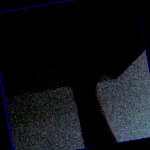

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


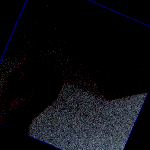

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


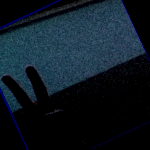

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


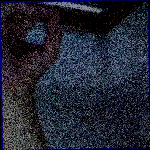

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


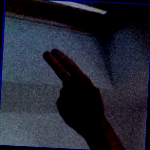

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0.]


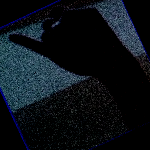

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0.]


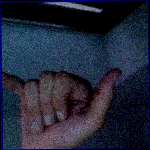

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0.]


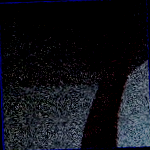

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


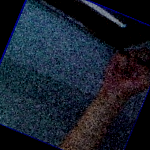

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


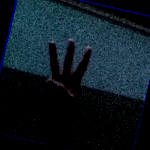

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


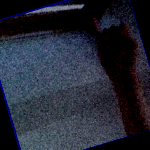

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


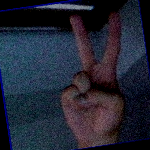

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


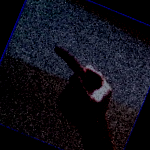

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1.]


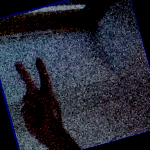

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


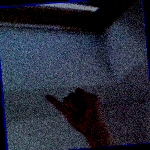

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0.]


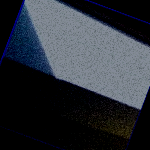

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


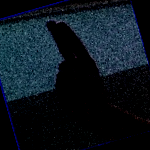

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0.]


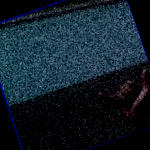

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0.]


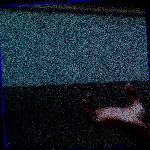

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


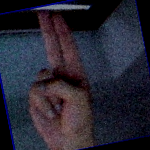

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0.]


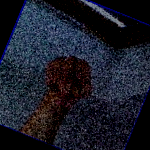

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0.]


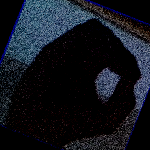

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


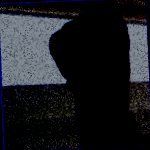

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


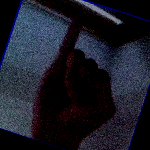

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


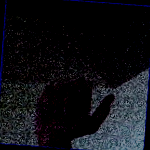

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


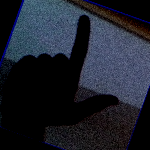

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0.]


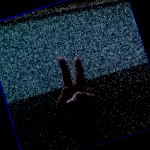

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


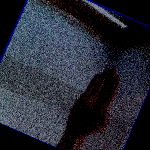

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


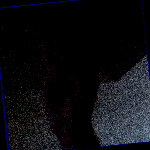

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


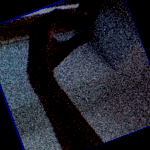

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


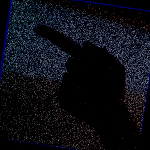

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1.]


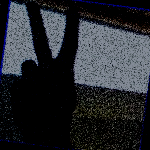

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [ ]:
for images, labels in train_generator:
  print(images.shape)
  print(labels.shape)
  for index in range(len(labels)):
    cv2_imshow(images[index])
    print(labels[index])
  break

## Model development

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, Dropout, Dense, Conv2D, MaxPooling2D, Flatten, Input
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
model = tf.keras.Sequential()

model.add(Input(shape=(150,150, 3)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(29, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 128)     3584      
                                                                 
 dropout (Dropout)           (None, 148, 148, 128)     0         
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 128)    512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 128)     147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 128)      0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 73, 73, 128)       0

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
acc_checkpoint = ModelCheckpoint('best_accuracy.h5', monitor="accuracy")


In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/freelancing/AMIT/models/best_accuracy.h5')

In [ ]:
model.fit(x = train_generator,
          validation_data = validation_generator,
          epochs=10,
          callbacks=[acc_checkpoint])

Epoch 1/10
   3/2202 [..............................] - ETA: 5:56:35 - loss: 21.0327 - accuracy: 0.0000e+00

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_generator)

## Transfer learning

In [ ]:
from tensorflow.keras.applications import ResNet50 as ResNet
from keras.utils.vis_utils import plot_model
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, Dropout, Dense, Conv2D, MaxPooling2D, Flatten, Input, GlobalAveragePooling2D
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint


In [ ]:
pretrained_model = ResNet(input_shape=(150,150, 3), include_top=False, weights="imagenet")

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
pretrained_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']      

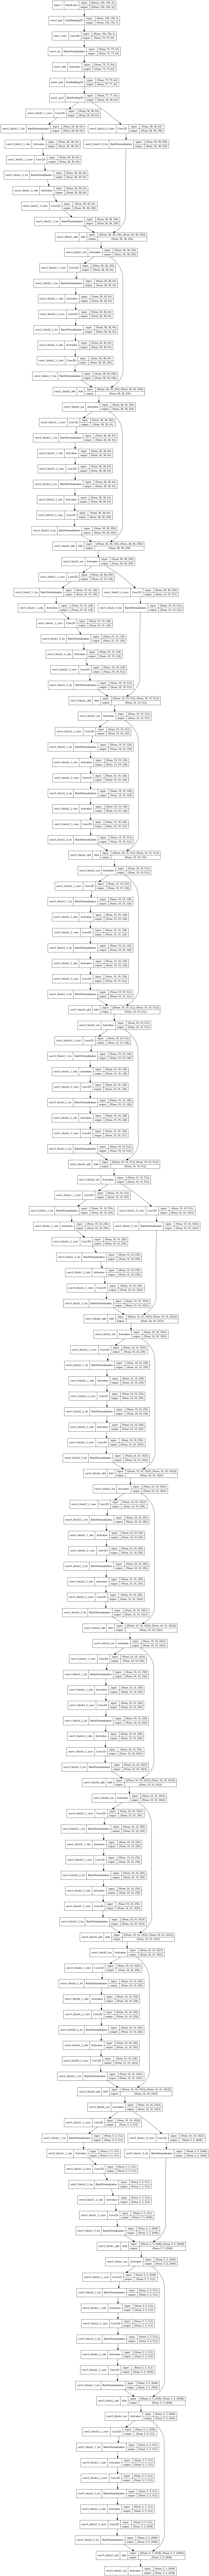

In [ ]:
plot_model(pretrained_model, to_file='resnet.png', show_shapes=True, show_layer_names=True)

In [ ]:
input_layer = Input(shape=(150,150, 3))
x = pretrained_model(input_layer)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)
output_layer = Dense(29, activation='softmax')(x)

model = keras.Model(inputs=input_layer, outputs=output_layer, name="transfer_learning_resnet")


In [ ]:
model.summary()

Model: "transfer_learning_resnet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_3 (Dense)             (None, 256)               524544    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_6 (Batc  (None, 256)              1024      
 hNormalization)                          

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
acc_checkpoint = ModelCheckpoint('/content/drive/MyDrive/freelancing/AMIT/models/best_accuracy.h5', monitor="val_accuracy")


In [ ]:
model.fit(x = train_generator,
          validation_data = validation_generator,  
          epochs=10,
          callbacks=[acc_checkpoint])

Epoch 1/10
2202/2202 [==============================] - ETA: 0s - loss: 0.2884 - accuracy: 0.9117

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


2202/2202 [==============================] - 895s 406ms/step - loss: 0.2884 - accuracy: 0.9117 - val_loss: 0.0930 - val_accuracy: 0.9707
Epoch 2/10
2202/2202 [==============================] - 895s 406ms/step - loss: 0.0764 - accuracy: 0.9765 - val_loss: 0.0490 - val_accuracy: 0.9853
Epoch 3/10
2202/2202 [==============================] - 893s 405ms/step - loss: 0.0549 - accuracy: 0.9828 - val_loss: 0.0394 - val_accuracy: 0.9871
Epoch 4/10
2202/2202 [==============================] - 895s 406ms/step - loss: 0.0419 - accuracy: 0.9866 - val_loss: 0.0437 - val_accuracy: 0.9845
Epoch 5/10
2202/2202 [==============================] - 894s 406ms/step - loss: 0.0306 - accuracy: 0.9906 - val_loss: 0.0077 - val_accuracy: 0.9973
Epoch 6/10
2202/2202 [==============================] - 894s 406ms/step - loss: 0.0281 - accuracy: 0.9917 - val_loss: 0.0208 - val_accuracy: 0.9941
Epoch 7/10
2202/2202 [==============================] - 890s 404ms/step - loss: 0.0217 - accuracy: 0.9938 - val_loss: 0.024

In [ ]:
acc_checkpoint.evaluate(train_generator , test_generator)